<a href="https://colab.research.google.com/github/monisakhtar/CarPrice/blob/main/Motorcycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from ast import increment_lineno
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Motorcycle Price Prediction/BIKE DETAILS.csv')
data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
data.shape

(1061, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [6]:
data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
#print(data['name'].value_counts())
print(data['seller_type'].value_counts())
print(data['owner'].value_counts())

Individual    1055
Dealer           6
Name: seller_type, dtype: int64
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64


In [8]:
data.drop('name', axis = 1, inplace = True)

In [9]:
data.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,175000,2019,Individual,1st owner,350,NaN
1,45000,2017,Individual,1st owner,5650,NaN
2,150000,2018,Individual,1st owner,12000,148114.0
3,65000,2015,Individual,1st owner,23000,89643.0
4,20000,2011,Individual,2nd owner,21000,NaN


In [10]:
# Missing values
data.isna().sum()

selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [17]:
np.round(data.isna().mean()*100, 4)

selling_price         0.0000
year                  0.0000
seller_type           0.0000
owner                 0.0000
km_driven             0.0000
ex_showroom_price    40.9991
dtype: float64

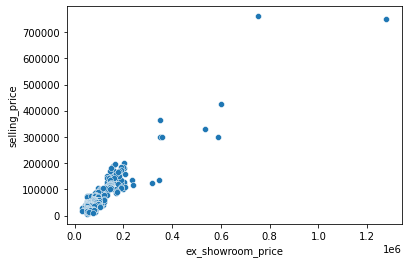

In [19]:
sns.scatterplot(y = 'selling_price', x = 'ex_showroom_price', data = data)

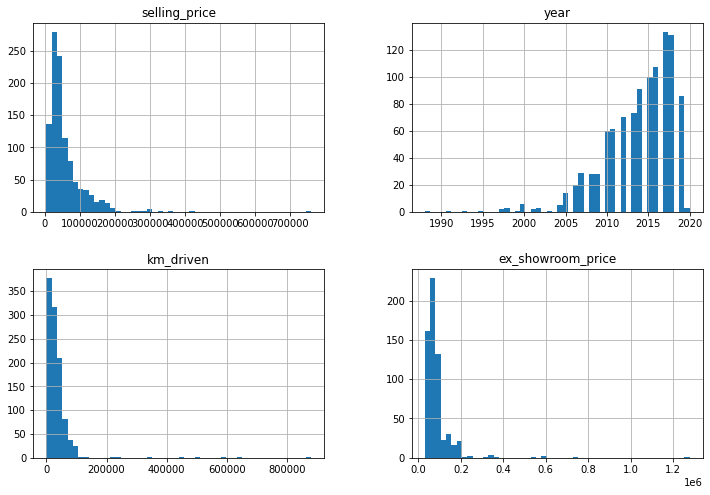

In [11]:
data.hist(bins=50, figsize=(12, 8))
plt.show()

In [12]:
data['selling_price'].quantile(0.5)

45000.0

In [13]:
data['selling_price'].median()

45000.0

In [14]:
data['selling_price'].quantile(0.75) - data['selling_price'].quantile(0.25)

42000.0

In [15]:
data['selling_price'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     15000.0
0.25     28000.0
0.50     45000.0
0.75     70000.0
0.95    150000.0
Name: selling_price, dtype: float64

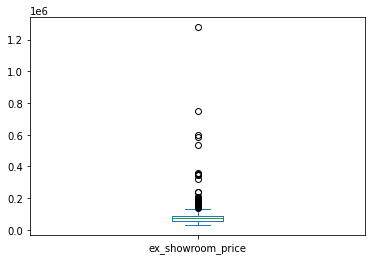

In [16]:
data['ex_showroom_price'].plot.box()

In [21]:
data['ex_showroom_price'].fillna(data['ex_showroom_price'].mean(), inplace = True)
data.isna().sum()

selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

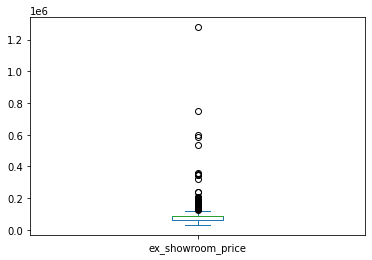

In [22]:
data['ex_showroom_price'].plot.box()

In [23]:
data.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,175000,2019,Individual,1st owner,350,87958.714058
1,45000,2017,Individual,1st owner,5650,87958.714058
2,150000,2018,Individual,1st owner,12000,148114.000000
3,65000,2015,Individual,1st owner,23000,89643.000000
4,20000,2011,Individual,2nd owner,21000,87958.714058


In [24]:
data['Current_Year'] = 2023

In [25]:
data['Car_Age'] = data['Current_Year'] - data['year']

In [26]:
data.head()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,Current_Year,Car_Age
0,175000,2019,Individual,1st owner,350,87958.714058,2023,4
1,45000,2017,Individual,1st owner,5650,87958.714058,2023,6
2,150000,2018,Individual,1st owner,12000,148114.000000,2023,5
3,65000,2015,Individual,1st owner,23000,89643.000000,2023,8
4,20000,2011,Individual,2nd owner,21000,87958.714058,2023,12


In [27]:
data.drop(['year', 'Current_Year'], axis = 1, inplace = True)
data.head()

,selling_price,seller_type,owner,km_driven,ex_showroom_price,Car_Age
0,175000,Individual,1st owner,350,87958.714058,4
1,45000,Individual,1st owner,5650,87958.714058,6
2,150000,Individual,1st owner,12000,148114.000000,5
3,65000,Individual,1st owner,23000,89643.000000,8
4,20000,Individual,2nd owner,21000,87958.714058,12


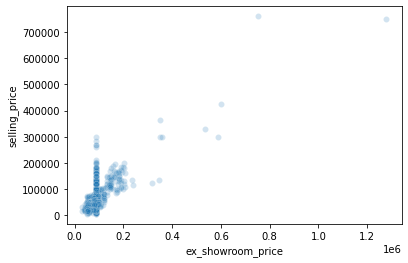

In [29]:
sns.scatterplot(y = 'selling_price', x = 'ex_showroom_price',alpha = 0.2, data = data)

In [30]:
corr_matrix = data.corr()

In [31]:
corr_matrix['selling_price'].sort_values(ascending = False)

selling_price        1.000000
ex_showroom_price    0.750451
km_driven           -0.212937
Car_Age             -0.402188
Name: selling_price, dtype: float64

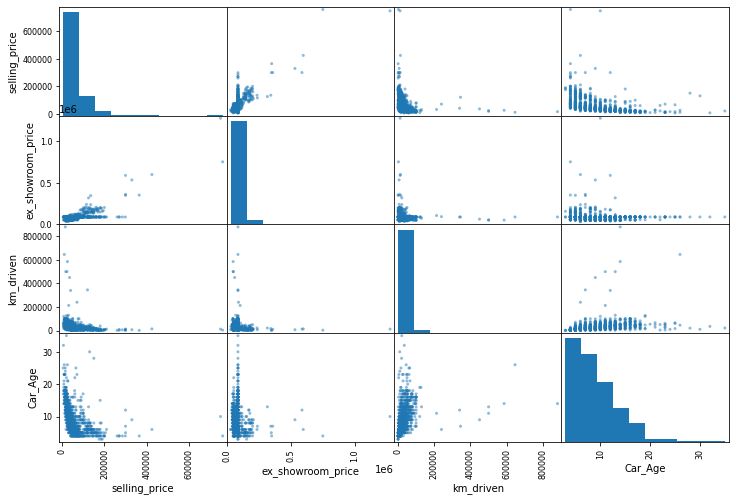

In [33]:
from pandas.plotting import scatter_matrix
attributes = ['selling_price',"ex_showroom_price", "km_driven", "Car_Age"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()